# Technical Assignment - IKEA DA

Prepared by **Michael Zhang** | 2021 Mar | @AMSTERDAM

## 0. Executive Summary

### Question 1: Propose a segmentation analysis

Seg A, B, C

### Question 3: Key segment(s) to focus to increase sales

Seg A
based on A, B, C reasons
* Increase sales is more of a short-term goal -> with the info I have, either focus on the large seg with potential to upsell (small improvement but big moneytory potential), or niche seg with great %growth potential

### Question 2: Potential data points to improve the analysis

* Unit info: understand if the product is of high unit price (which may not be purchased again in a short term)
* Category info: similar to above; also make it difficult to interpret the clustering
* Transactional info: what does it buy together per order -> basket analysis, frequency analysis, recency (3D of CLV or CV)


### Question 4: Prediction of the value in "HaveChildren" with vitualization

## 1. Data Import and Exploration

In [ ]:
## Build a data cleaning package/notebook

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
# from sklearn-extras
# from sk-learn-extra

##### Load raw data and convert to proper data type

In [141]:
df = pd.read_csv('RetailCustomerSales.csv',sep = ';', dtype = {'CustomerID':'category',
                                                               'ItemID':'category',
                                                               'Sex':'category',
                                                               'Age':'category',
                                                               'Profession':'category',
                                                               'CityType':'category',
                                                               'YearsInCity':'category',
                                                               'HaveChildren':'category',
                                                               'ItemCategory1':'category',
                                                               'ItemCategory2':'category',
                                                               'ItemCategory3':'category'})

# df = pd.read_csv('RetailCustomerSales.csv',sep = ';', dtype = {'CustomerID':'str',
#                                                                'ItemID':'str',
#                                                                'Sex':'str',
#                                                                'Age':'str',
#                                                                'Profession':'str',
#                                                                'CityType':'str',
#                                                                'YearsInCity':'str',
#                                                                'HaveChildren':'str',
#                                                                'ItemCategory1':'str',
#                                                                'ItemCategory2':'str',
#                                                                'ItemCategory3':'str'})

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     537577 non-null  object
 1   ItemID         537577 non-null  object
 2   Sex            537577 non-null  object
 3   Age            537577 non-null  object
 4   Profession     537577 non-null  object
 5   CityType       537577 non-null  object
 6   YearsInCity    537577 non-null  object
 7   HaveChildren   517407 non-null  object
 8   ItemCategory1  537577 non-null  object
 9   ItemCategory2  370591 non-null  object
 10  ItemCategory3  164278 non-null  object
 11  Amount         537577 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 49.2+ MB


##### Check Null value
Only HaveChildren col has NaN

In [144]:
print(df.isnull().sum())

CustomerID            0
ItemID                0
Sex                   0
Age                   0
Profession            0
CityType              0
YearsInCity           0
HaveChildren      20170
ItemCategory1         0
ItemCategory2    166986
ItemCategory3    373299
Amount                0
dtype: int64


In [147]:
# len(df['CustomerID'].unique())
consumer_spend = df.groupby('CustomerID')['Amount'].sum().sort_values()
consumer_spend.describe()

#plot: check outliers

CustomerID
1004991       44108
1005117       44432
1005012       45551
1005944       46070
1004464       46091
             ...   
1000424     6573609
1001941     6817493
1002909     7577505
1001680     8699232
1004277    10536783
Name: Amount, Length: 5891, dtype: int64


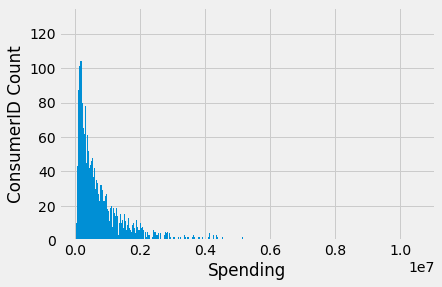

In [148]:
#plot: check potential outliers and distribution
plt.style.use("fivethirtyeight")
plt.hist(consumer_spend, bins = 1000)
plt.xlabel("Spending")
plt.ylabel("ConsumerID Count")
plt.show() # turn into boxplot

In [ ]:
## Numeric Outlier: set IQR to filter out the outlier
## Ref: https://quantdare.com/isolation-forest-algorithm/

IQR = ((1.099005e+06-2.349140e+05)*1.5

In [ ]:
## Try using log to run the clustering

**Based on above chart, turn spending per consumer into log scale skew to positive side (check the ref)**

In [150]:
# len(df['ItemID'].unique())
item_consumer = df.groupby('ItemID')['CustomerID'].nunique().sort_values()
item_consumer.describe()

ItemID
P00056542       1
P00013442       1
P00013542       1
P00013842       1
P00206542       1
             ... 
P00057642    1430
P00112142    1539
P00025442    1586
P00110742    1591
P00265242    1858
Name: CustomerID, Length: 3623, dtype: int64


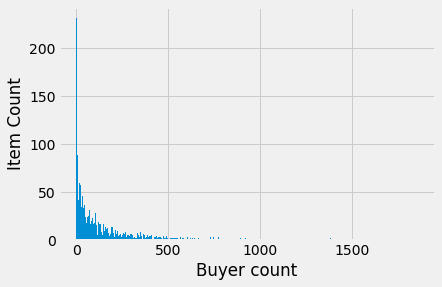

In [151]:
#plot popular product and check distribution
plt.style.use("fivethirtyeight")
plt.hist(item_consumer, bins = 1000)
plt.xlabel("Buyer count")
plt.ylabel("Item Count")
plt.show()

In [153]:
# len(df['ItemID'].unique())
item_sales = df.groupby('ItemID')['Amount'].sum().sort_values()
item_sales.describe()

#plot high sales value

ItemID
P00091742         405
P00309042         726
P00353042        1545
P00325342        1656
P00012942        1717
               ...   
P00059442    23948299
P00184942    24060871
P00255842    24652442
P00110742    26382569
P00025442    27532426
Name: Amount, Length: 3623, dtype: int64


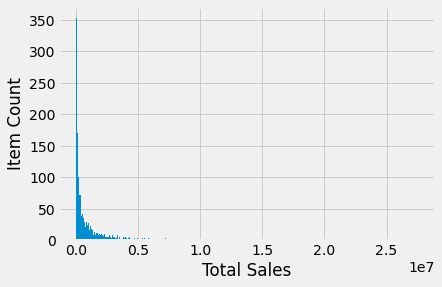

In [154]:
#plot high total sales value and check distribution
plt.style.use("fivethirtyeight")
plt.hist(item_sales, bins = 1000)
plt.xlabel("Total Sales")
plt.ylabel("Item Count")
plt.show()

In [156]:
# df['Sex'].unique()
sex = df.groupby('Sex')['CustomerID'].nunique().sort_index()
plt.style.use("fivethirtyeight")
plt.bar(sex.index,sex)
plt.xlabel("Sex")
plt.ylabel("Consumer Count")
plt.show()

Sex
F    1666
M    4225
Name: CustomerID, dtype: int64


In [157]:
# pd.Series(list(df['Age'].unique().astype('str'))).sort_values() # as category
# df['Sex'].unique()
age = df.groupby('Age')['CustomerID'].nunique().sort_index()
plt.style.use("fivethirtyeight")
plt.bar(age.index,age)
plt.xlabel("Age")
plt.ylabel("Consumer Count")
plt.show()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: CustomerID, dtype: int64


In [158]:
# df['CityType'].unique()
CityType = df.groupby('CityType')['CustomerID'].nunique().sort_index()
plt.style.use("fivethirtyeight")
plt.bar(CityType.index,CityType)
plt.xlabel("CityType")
plt.ylabel("Consumer Count")
plt.show()

CityType
A    1045
B    1707
C    3139
Name: CustomerID, dtype: int64


In [159]:
# df['YearsInCity'].unique() # as category
# YearsInCity = df['YearsInCity'].unique()
# print(np.sort(YearsInCity))
YearsInCity = df.groupby('YearsInCity')['CustomerID'].nunique().sort_index()
plt.style.use("fivethirtyeight")
plt.bar(YearsInCity.index,YearsInCity)
plt.xlabel("YearsInCity")
plt.ylabel("Consumer Count")
plt.show()

YearsInCity
0      772
1     2086
2     1145
3      979
4+     909
Name: CustomerID, dtype: int64


In [160]:
# pd.Series(list(df['Profession'].unique().astype('int'))).sort_values() # as category
# Profession = df['Profession'].nunique()
# print(np.sort(Profession))
Profession = df.groupby('Profession')['CustomerID'].nunique().sort_index()
#plt to see if there is significant inbalanced value
plt.style.use("fivethirtyeight")
plt.bar(Profession.index,Profession)
plt.xlabel("Profession")
plt.ylabel("Consumer Count")
plt.show()

Profession
0     688
1     517
10    192
11    128
12    376
13    140
14    294
15    140
16    235
17    491
18     67
19     71
2     256
20    273
3     170
4     740
5     111
6     228
7     669
8      17
9      88
Name: CustomerID, dtype: int64


In [162]:
# df['HaveChildren'].unique()
# df.loc[df['HaveChildren'].isnull(),'CustomerID'].nunique()
HaveChildren = df.groupby('HaveChildren',dropna=False)['CustomerID'].nunique().sort_index()
plt.style.use("fivethirtyeight")
plt.bar(HaveChildren.index,HaveChildren)
plt.xlabel("HaveChildren")
plt.ylabel("Consumer Count")
plt.show()

HaveChildren
0      3280
1      2399
NaN     212
Name: CustomerID, dtype: int64


**212 consumers are without Children info. Will need to run clustering twice - with and without NaN**

###### Check how the category works

In [166]:
df.loc[df['ItemCategory1'] == df['ItemCategory2'],'ItemID'].unique()
## cat start small

array([], dtype=object)

In [167]:
ItemCombo = df.groupby(['ItemCategory1','ItemCategory2','ItemCategory3'],
                       dropna=False)['ItemID'].nunique().sort_values()
ItemCombo_reindex = ItemCombo.reset_index()
plt.style.use("fivethirtyeight")
plt.hist(ItemCombo_reindex.ItemID, bins = 1000)
plt.xlabel("Category Combo")
plt.ylabel("Item Count")
plt.show()

ItemCategory1  ItemCategory2  ItemCategory3
9              NaN            NaN                1
5              8              12                 1
               6              9                  1
1              8              9                  1
                              18                 1
                                              ... 
5              14             NaN              136
               8              NaN              150
11             NaN            NaN              171
5              NaN            NaN              488
8              NaN            NaN              727
Name: ItemID, Length: 235, dtype: int64


In [169]:
ItemComboSales = df.groupby(['ItemCategory1','ItemCategory2','ItemCategory3'],
                       dropna=False)['Amount'].sum().sort_values()
ItemComboSales_reindex = ItemComboSales.sort_values().reset_index()
plt.style.use("fivethirtyeight")
plt.hist(ItemComboSales_reindex.Amount, bins = 1000)
plt.xlabel("Category Combo")
plt.ylabel("Sales")
plt.show()

ItemCategory1  ItemCategory2  ItemCategory3
5              10             16                    7218
9              NaN            NaN                  18456
10             11             NaN                  19206
4              9              NaN                  29149
8              14             18                  117448
                                                 ...    
5              8              NaN              149089678
1              2              15               191990411
               16             NaN              198147606
5              NaN            NaN              383126455
8              NaN            NaN              449437193
Name: Amount, Length: 235, dtype: int64


## 2. Segmentation

Some options I have/decisions I have to make/Reasoning:
1. If there is an outlier -> looks like the data is quite clean
2. To standardize or not (for cat amount and the total amount)  
using mapping and replace  
CustomerID -> group by  
ItemID -> drop  
Sex -> to -1 and 1; group by  
Age -> take the medium and rescale (0-17 as 16; 55+ as 60)/ rescale  
Profession -> one-hot encoding?  
CityType -> 1/A, 0/B, -1/C? 
YearsInCity -> convert to numbers (4+ as 4); group by  
(hold on) HaveChildren -> to -1(N), 0 (NULL) and 1(Y); group by   
235 cateogires -> both take log and rescale  
Amount -> tke the log and rescale  
3. 18 main cat (with amount overlap and also corelation between cats) or 200+ combo cat
4. can I use k-means++ to set the centroid
5. k-means, k-prototype, k-mode/medroid
6. what evaluation metrics to use: EC, explanationary, SW

### 2.1 Data Preparation

In [172]:
## Group by the demographic features
df_gb = df.copy()
df_gb = df_gb.groupby(['CustomerID','Sex','Age','Profession',\
                      'CityType','YearsInCity','HaveChildren'],dropna=False)['Amount']\
                      .sum().reset_index().set_index('CustomerID')
df_gb = df_gb.rename(columns={'Amount':'TotalSpending'})

In [173]:
## Create mapping for sex, age, CityType, YearsInCity
replace_map = {'Sex': {'M': 1, 'F': 0},
               'Age': {'0-17': 16, '18-25': 21.5, '26-35': 30.5, '36-45': 40.5,
                       '46-50': 48, '51-55': 53, '55+': 55},
               'CityType': {'A': 1, 'B': 2, 'C': 3},
               'YearsInCity': {'0': 0, '1': 1, '2': 2, '3':3, '4+':4},
               'HaveChildren': {'0': -0.5, '1': 0.5}}

In [174]:
## Replace the value with the mapping
df_demo = df_gb.copy()
df_demo.replace(replace_map, inplace=True)
df_demo.drop(columns='Profession', inplace=True)

print(df_demo.head())

            Sex   Age  CityType  YearsInCity  HaveChildren  TotalSpending
CustomerID                                                               
1000001       0  16.0         1            2          -0.5         333481
1000002       1  55.0         3            4          -0.5         810353
1000003       1  30.5         1            3          -0.5         341635
1000004       1  48.0         2            2           0.5         205987
1000005       1  30.5         1            1           0.5         821001


In [175]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            5891 non-null   int64  
 1   Age            5891 non-null   float64
 2   CityType       5891 non-null   int64  
 3   YearsInCity    5891 non-null   int64  
 4   HaveChildren   5679 non-null   float64
 5   TotalSpending  5891 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 322.2+ KB


In [176]:
## Create one-hot encoding for professions

df_prof = df_gb.copy().reset_index().set_index('CustomerID')
df_prof.drop(columns=['Sex','Age','CityType','YearsInCity','HaveChildren','TotalSpending'], inplace=True)
df_prof = pd.get_dummies(df_prof, columns=['Profession'], prefix = ['Prof'])

print(df_prof.head())

            Prof_0  Prof_1  Prof_10  Prof_11  Prof_12  Prof_13  Prof_14  \
CustomerID                                                                
1000001          0       0        1        0        0        0        0   
1000002          0       0        0        0        0        0        0   
1000003          0       0        0        0        0        0        0   
1000004          0       0        0        0        0        0        0   
1000005          0       0        0        0        0        0        0   

            Prof_15  Prof_16  Prof_17  ...  Prof_19  Prof_2  Prof_20  Prof_3  \
CustomerID                             ...                                     
1000001           0        0        0  ...        0       0        0       0   
1000002           0        1        0  ...        0       0        0       0   
1000003           1        0        0  ...        0       0        0       0   
1000004           0        0        0  ...        0       0        0      

In [177]:
## Create one-hot encoding for cat combo
# df_cat = df.groupby(['CustomerID','ItemCategory1',
#                      'ItemCategory2','ItemCategory3'])['Amount'].sum()

df_combo = df.copy()

# df_combo['CatCombo'] = df_combo[['ItemCategory1','ItemCategory2','ItemCategory3']]\
#                        .agg('_'.join, axis=1)

df_combo['ItemCategory2'].fillna('N', inplace=True)
df_combo['ItemCategory3'].fillna('N', inplace=True)

df_combo['CatCombo'] = df_combo['ItemCategory1']+'_'\
                       +df_combo['ItemCategory2']+'_'\
                       +df_combo['ItemCategory3']

print(df_combo.sort_values(['CatCombo']).head())

       CustomerID     ItemID Sex    Age Profession CityType YearsInCity  \
137562    1003292  P00308042   F  51-55          6        B           3   
409858    1003110  P00346542   M  26-35          0        B           3   
3908      1000645  P00116142   M  36-45         20        A           2   
220120    1003934  P00161842   M  26-35          0        B           2   
130594    1002049  P00116142   F  51-55          0        A           1   

       HaveChildren ItemCategory1 ItemCategory2 ItemCategory3  Amount  \
137562            0            10            11             N   19206   
409858            1            10            13            16    4932   
3908            NaN            10            13            16   23395   
220120            0            10            13            16    4627   
130594            1            10            13            16   14258   

        CatCombo  
137562   10_11_N  
409858  10_13_16  
3908    10_13_16  
220120  10_13_16  
130594  10_13_1

In [178]:
df_combo = pd.pivot_table(df_combo, values=['Amount'], index=['CustomerID'],\
                          columns=['CatCombo'], aggfunc=np.sum, fill_value=0)\
                          .reset_index().set_index('CustomerID').droplevel(0, axis=1)

df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Columns: 235 entries, 10_11_N to 9_N_N
dtypes: int64(235)
memory usage: 10.6+ MB


In [179]:
print(df_combo.head())

CatCombo    10_11_N  10_13_16  10_13_N  10_14_16  10_15_16  10_15_N  10_16_N  \
CustomerID                                                                     
1000001           0         0        0         0         0        0        0   
1000002           0         0        0         0         0        0        0   
1000003           0         0        0         0         0        0        0   
1000004           0         0        0         0         0        0        0   
1000005           0         0        0         0         0        0        0   

CatCombo    10_N_N  11_13_16  11_13_N  ...  8_15_N  8_16_17  8_16_N  8_17_N  \
CustomerID                             ...                                    
1000001          0         0        0  ...       0        0       0    9938   
1000002          0         0        0  ...   16001        0   17865    6187   
1000003          0         0        0  ...       0        0    5817       0   
1000004          0         0        0  ...  

In [180]:
## Complie all the features together
df_compile = df_demo.join([df_prof, df_combo])

In [181]:
print(df_compile.head(20))

            Sex   Age  CityType  YearsInCity  HaveChildren  TotalSpending  \
CustomerID                                                                  
1000001       0  16.0         1            2          -0.5         333481   
1000002       1  55.0         3            4          -0.5         810353   
1000003       1  30.5         1            3          -0.5         341635   
1000004       1  48.0         2            2           0.5         205987   
1000005       1  30.5         1            1           0.5         821001   
1000006       0  53.0         1            1          -0.5         379450   
1000007       1  40.5         2            1           0.5         234427   
1000008       1  30.5         3            4           0.5         796545   
1000009       1  30.5         3            0          -0.5         593960   
1000010       0  40.5         2            4           0.5        2169486   
1000011       0  30.5         3            1          -0.5         556902   

In [182]:
df_compile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Columns: 262 entries, Sex to 9_N_N
dtypes: float64(2), int64(239), uint8(21)
memory usage: 11.1+ MB


In [183]:
## With HaveChildren set
df_full = df_compile.fillna(0)

In [184]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Columns: 262 entries, Sex to 9_N_N
dtypes: float64(2), int64(239), uint8(21)
memory usage: 11.1+ MB


In [185]:
## Without HaveChildren set
df_dropna = df_compile.dropna(subset=['HaveChildren'])

In [186]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5679 entries, 1000001 to 1006040
Columns: 262 entries, Sex to 9_N_N
dtypes: float64(2), int64(239), uint8(21)
memory usage: 10.6+ MB


### 2.2 Clustering with all data

In [187]:
## K-means
## Ref: https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means
## Ref: https://realpython.com/k-means-clustering-python/

## PAM (Partitioning Around Medoids)
## Ref: https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677

## Categorical data
## Ref: https://www.datacamp.com/community/tutorials/categorical-data
## Ref: https://pbpython.com/categorical-encoding.html  
## Ref: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
## Ref: https://stats.stackexchange.com/questions/393331/is-one-hot-encoding-and-standardization-of-data-equivalent-to-gowers-distance
## Ref: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20is,is%20marked%20with%20a%201.
## Ref: https://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data


##### Convert dataframe to array

In [188]:
# features_full = df_full[['Sex','Age','CityType','YearsInCity','HaveChildren','TotalSpending']].to_numpy()
# features_full

##### Scale the features

In [189]:
# scaler = MinMaxScaler()
# scaled_features_full = scaler.fit_transform(features_full)
# scaled_features_full

##### Set the parameter of K-means clustering

In [190]:
# kmeans = KMeans(
#     init="k-means++",
#     n_clusters=4,
#     n_init=50,
#     max_iter=500,
#     random_state=42
# )

In [191]:
# kmeans.fit(scaled_features_full)

##### Result & Evaluation

In [192]:
# # The lowest SSE value
# kmeans.inertia_

In [193]:
# # Final locations of the centroid
# kmeans.cluster_centers_

In [194]:
# # The number of iterations required to converge
# kmeans.n_iter_

In [195]:
# kmeans.labels_[:5]

##### SSE

In [196]:
# kmeans_kwargs = {
#     "init": "k-means++",
#     "n_init": 10,
#     "max_iter": 300,
#     "random_state": 42,
# }

# # A list holds the SSE values for each k
# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(scaled_features_full)
#     sse.append(kmeans.inertia_)

In [197]:
# ## Determine the elbow from plot
# plt.style.use("fivethirtyeight")
# plt.plot(range(1, 11), sse)
# plt.xticks(range(1, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

In [198]:
# ## Determine the elbow programmatically
# kl = KneeLocator(
#     range(1, 11), sse, curve="convex", direction="decreasing"
# )

# kl.elbow

#### Evaluation - silhouette coefficients

In [199]:
# # A list holds the silhouette coefficients for each k
# silhouette_coefficients = []

# # Notice you start at 2 clusters for silhouette coefficient
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(scaled_features_full)
#     score = silhouette_score(scaled_features_full, kmeans.labels_)
#     silhouette_coefficients.append(score)

In [200]:
# ## Determine the max(sc) from plot
# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()

#### Build the pipeline

In [201]:
def KMeanClusterM(n, data):
    
    preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler())
        ]
    )

    clusterer = Pipeline(
       [
           (
               "kmeans",
               KMeans(
                   n_clusters=n,
                   init="k-means++",
                   n_init=50,
                   max_iter=500,
                   random_state=99,
               ),
           ),
       ]
    )

    pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )

    pipe.fit(data)
    
    preprocessed_data = pipe["preprocessor"].transform(data)

    predicted_labels = pipe["clusterer"]["kmeans"].labels_
    
    return predicted_labels, silhouette_score(preprocessed_data, predicted_labels)

In [202]:
def KMeanClusterS(n, data):
    
    preprocessor = Pipeline(
        [
            ("scaler", StandardScaler())
        ]
    )

    clusterer = Pipeline(
       [
           (
               "kmeans",
               KMeans(
                   n_clusters=n,
                   init="k-means++",
                   n_init=50,
                   max_iter=500,
                   random_state=99,
               ),
           ),
       ]
    )

    pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )

    pipe.fit(data)
    
    preprocessed_data = pipe["preprocessor"].transform(data)

    predicted_labels = pipe["clusterer"]["kmeans"].labels_
    
    return predicted_labels, silhouette_score(preprocessed_data, predicted_labels)

##### Use the complete data

In [203]:
features_full = df_full.iloc[:,:6].to_numpy()
features_full

array([[ 0.000000e+00,  1.600000e+01,  1.000000e+00,  2.000000e+00,
        -5.000000e-01,  3.334810e+05],
       [ 1.000000e+00,  5.500000e+01,  3.000000e+00,  4.000000e+00,
        -5.000000e-01,  8.103530e+05],
       [ 1.000000e+00,  3.050000e+01,  1.000000e+00,  3.000000e+00,
        -5.000000e-01,  3.416350e+05],
       ...,
       [ 0.000000e+00,  5.500000e+01,  3.000000e+00,  2.000000e+00,
        -5.000000e-01,  8.085900e+04],
       [ 0.000000e+00,  4.800000e+01,  2.000000e+00,  4.000000e+00,
         5.000000e-01,  5.545040e+05],
       [ 1.000000e+00,  3.050000e+01,  2.000000e+00,  2.000000e+00,
        -5.000000e-01,  1.562615e+06]])

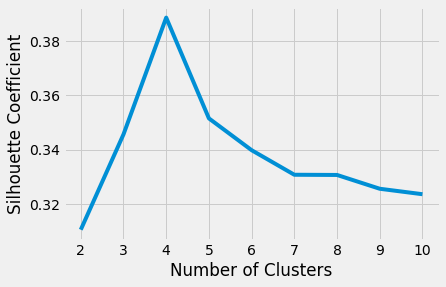

In [204]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients1M = []
predicted_labels1M = []

for k in range(2, 11):
    pred_labels, sc = KMeanClusterM(k, features_full)
    silhouette_coefficients.append(sc)
    predicted_labels1M.append(pred_labels)
    
## Determine the max(sc) from plot
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients1M)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

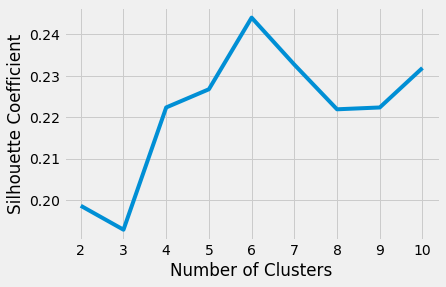

In [205]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients1S = []
predicted_labels1S = []

for k in range(2, 11):
    pred_labels, sc = KMeanClusterS(k, features_full)
    silhouette_coefficients1S.append(sc)
    predicted_labels1S.append(pred_labels)
    
## Determine the max(sc) from plot
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients1S)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Use the non-NA data (of "HaveChildren")

In [206]:
features_dropna = df_dropna.iloc[:,:6].to_numpy()
features_dropna

array([[ 0.000000e+00,  1.600000e+01,  1.000000e+00,  2.000000e+00,
        -5.000000e-01,  3.334810e+05],
       [ 1.000000e+00,  5.500000e+01,  3.000000e+00,  4.000000e+00,
        -5.000000e-01,  8.103530e+05],
       [ 1.000000e+00,  3.050000e+01,  1.000000e+00,  3.000000e+00,
        -5.000000e-01,  3.416350e+05],
       ...,
       [ 0.000000e+00,  5.500000e+01,  3.000000e+00,  2.000000e+00,
        -5.000000e-01,  8.085900e+04],
       [ 0.000000e+00,  4.800000e+01,  2.000000e+00,  4.000000e+00,
         5.000000e-01,  5.545040e+05],
       [ 1.000000e+00,  3.050000e+01,  2.000000e+00,  2.000000e+00,
        -5.000000e-01,  1.562615e+06]])

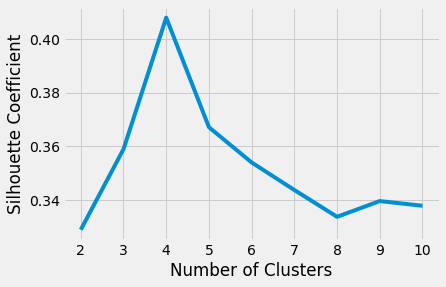

In [207]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients2 = []
predicted_labels2 = []

for k in range(2, 11):
    pred_labels, sc = KMeanClusterM(k, features_dropna)
    silhouette_coefficients2.append(sc)
    predicted_labels2.append(pred_labels)
    
## Determine the max(sc) from plot
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients2)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

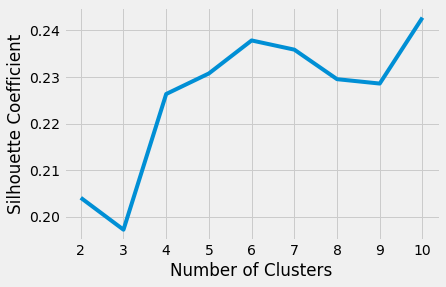

In [208]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients2 = []
predicted_labels2 = []

for k in range(2, 11):
    pred_labels, sc = KMeanClusterS(k, features_dropna)
    silhouette_coefficients2.append(sc)
    predicted_labels2.append(pred_labels)
    
## Determine the max(sc) from plot
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients2)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### 2.3 Descriptives of each cluster

##### Assigning labels to each row

In [219]:
df_clustered = df_gb.copy()
df_clustered['cluster'] = predicted_labels[4]

for col in ['Sex','Age','Profession','CityType','YearsInCity','HaveChildren','cluster']:
    df_clustered[col] = df_clustered[col].astype('category')

df_clustered = df_clustered.join(df_combo).reset_index()

In [220]:
## customer counts in each cluster
df_clustered.groupby('cluster')['CustomerID'].count()

cluster
0     593
1     693
2    1358
3     899
4    1783
5     565
Name: CustomerID, dtype: int64

##### Descriptive by each cluster
* sex split
* age distribution
* CityType
* YearsInCity
* HaveChildren
* TotalSpending

In [221]:
## customer counts in each cluster
df_clustered.groupby(['cluster','Sex'])['CustomerID'].count()/len(df_clustered)

cluster  Sex
0        F      0.000000
         M      0.100662
1        F      0.117637
         M      0.000000
2        F      0.000000
         M      0.230521
3        F      0.152606
         M      0.000000
4        F      0.000000
         M      0.302665
5        F      0.012562
         M      0.083347
Name: CustomerID, dtype: float64

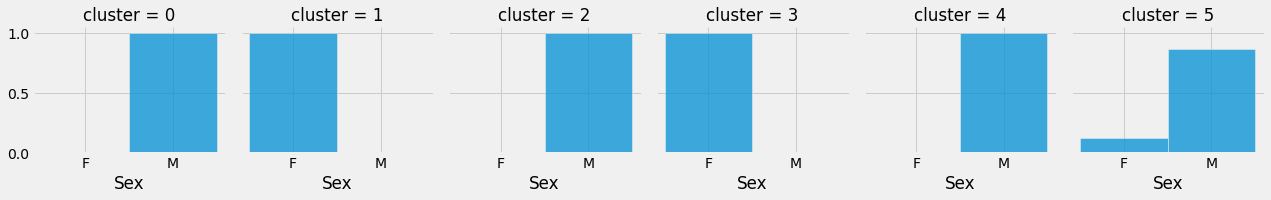

In [248]:
g0 = sns.FacetGrid(df_clustered, col="cluster")
g0.map(sns.histplot,'Sex',stat="density", common_norm=False)
# g1.fig

In [223]:
## customer counts in each cluster
df_clustered.groupby(['cluster','CityType'])['CustomerID'].count()/len(df_clustered)

cluster  CityType
0        A           0.099304
         B           0.001358
         C           0.000000
1        A           0.015108
         B           0.034459
         C           0.068070
2        A           0.000000
         B           0.063826
         C           0.166695
3        A           0.028348
         B           0.044984
         C           0.079273
4        A           0.000000
         B           0.083857
         C           0.218808
5        A           0.034629
         B           0.061280
         C           0.000000
Name: CustomerID, dtype: float64

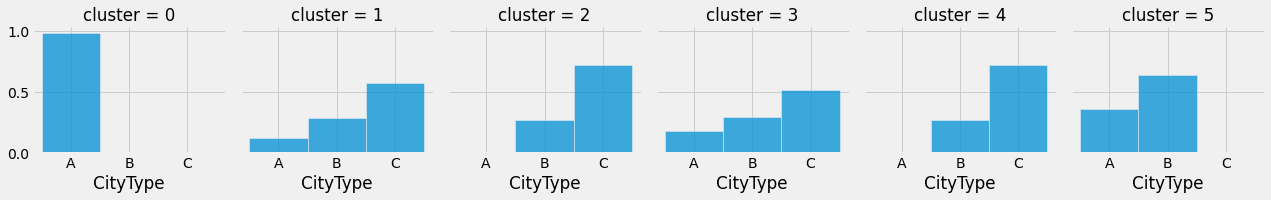

In [247]:
g1 = sns.FacetGrid(df_clustered, col="cluster")
g1.map(sns.histplot,'CityType',stat="density", common_norm=False)
# g1.fig

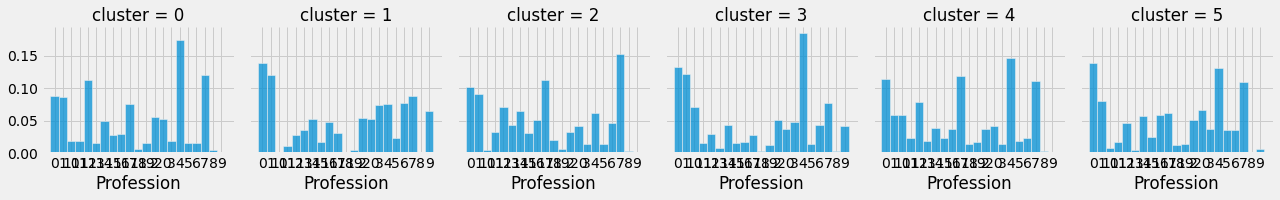

In [246]:
## Difficult to interpret - optentially related to income level/education etc.
g2 = sns.FacetGrid(df_clustered, col="cluster")
g2.map(sns.histplot,'Profession',stat="density", common_norm=False)
# g2.fig

In [226]:
# ## customer aounts in each cluster
# df_clustered.groupby(['cluster'])['Age'].mean()

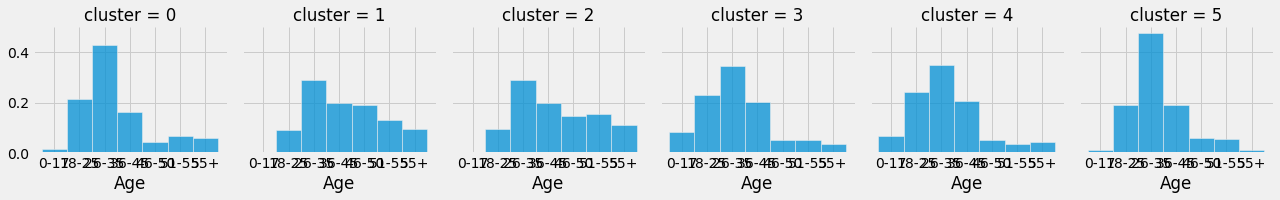

In [245]:
g3 = sns.FacetGrid(df_clustered, col="cluster")
g3.map(sns.histplot,'Age',stat="density", common_norm=False)
# g3.fig

In [236]:
## customer counts in each cluster
df_clustered.groupby(['cluster','YearsInCity'])['YearsInCity'].count()

cluster  YearsInCity
0        0               74
         1              233
         2               90
         3               99
         4+              97
1        0               90
         1              259
         2              135
         3              116
         4+              93
2        0              161
         1              496
         2              278
         3              211
         4+             212
3        0              116
         1              314
         2              184
         3              155
         4+             130
4        0              248
         1              595
         2              358
         3              293
         4+             289
5        0               83
         1              189
         2              100
         3              105
         4+              88
Name: YearsInCity, dtype: int64

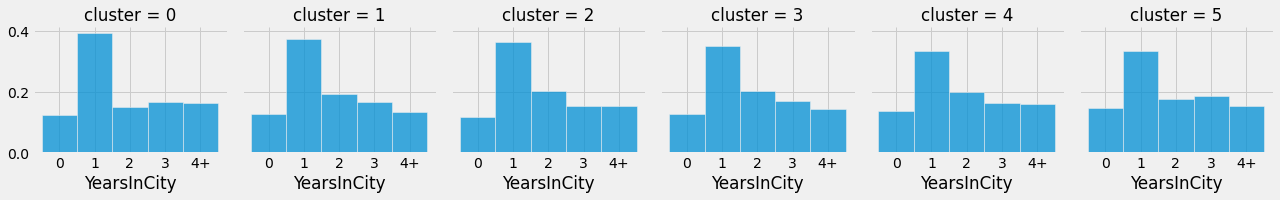

In [249]:
g4 = sns.FacetGrid(df_clustered, col="cluster")
g4.map(sns.histplot,'YearsInCity',stat="density", common_norm=False)
# g3.fig

In [230]:
## customer counts in each cluster
df_clustered.groupby(['cluster','HaveChildren'])['CustomerID'].count()/len(df_clustered)

cluster  HaveChildren
0        0               0.058055
         1               0.037345
1        0               0.000000
         1               0.112545
2        0               0.000000
         1               0.223731
3        0               0.147174
         1               0.000000
4        0               0.293499
         1               0.000000
5        0               0.058055
         1               0.033611
Name: CustomerID, dtype: float64

ConversionError: Failed to convert value(s) to axis units: 2         0
4         1
14      NaN
18        0
19        0
       ... 
5870      1
5874      1
5878      0
5882      0
5884      0
Name: x, Length: 593, dtype: category
Categories (2, object): ['0', '1']

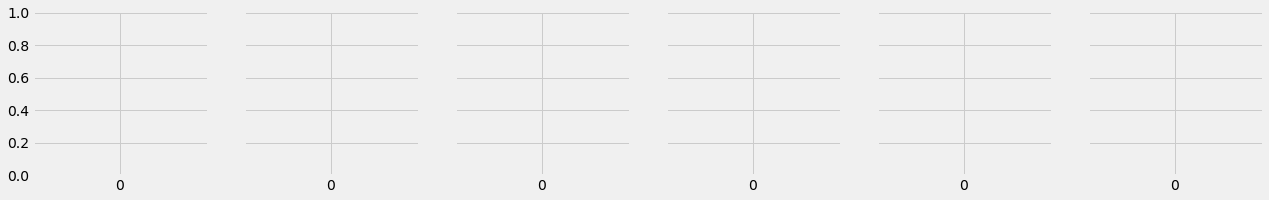

In [237]:
g5 = sns.FacetGrid(df_clustered, col="cluster")
g5.map(sns.histplot,'HaveChildren')
# g3.fig

In [238]:
df_clustered.groupby(['cluster'])['TotalSpending'].mean()

cluster
0    7.118089e+05
1    5.619352e+05
2    6.243762e+05
3    5.808918e+05
4    6.076993e+05
5    3.101756e+06
Name: TotalSpending, dtype: float64

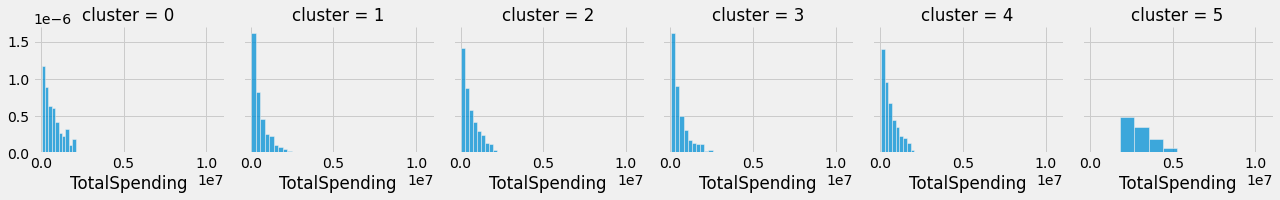

In [253]:
g6 = sns.FacetGrid(df_clustered, col="cluster")
g6.map(sns.histplot,'TotalSpending',stat="density", common_norm=False, bins=10)
# g3.fig